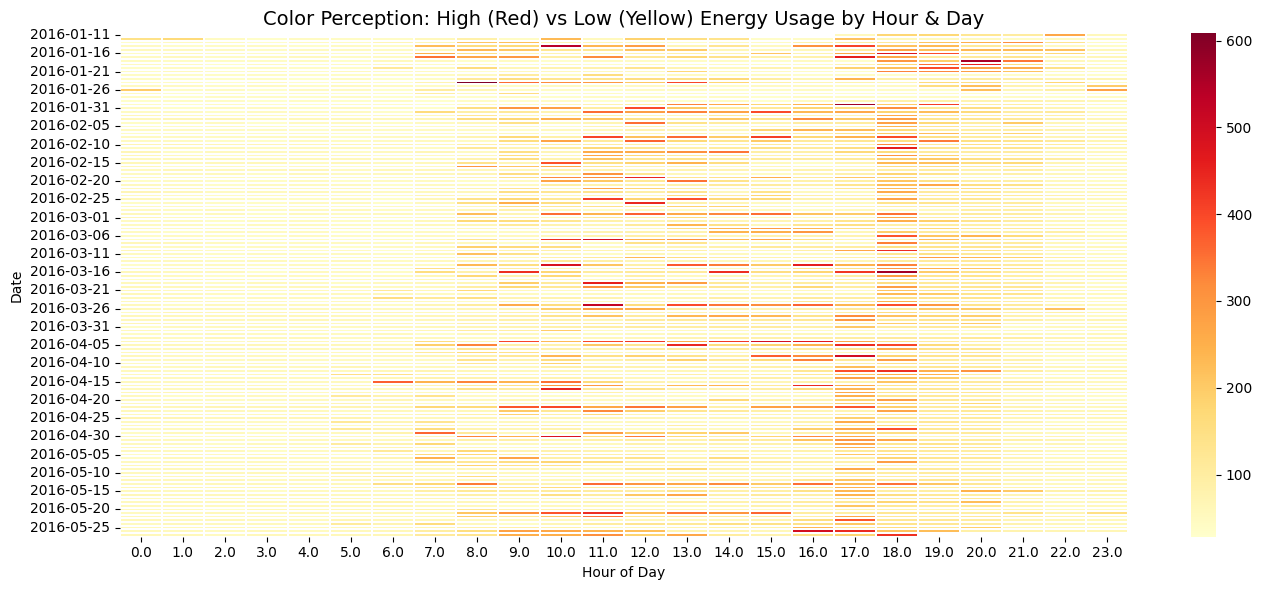

In [ ]:
# ==========================================
# QUESTION 1: COLOR PERCEPTION IN ENERGY VISUALIZATION
# ==========================================

# 📦 Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Step 2: Load dataset
# (Upload 'energydata_complete.csv' to your Colab environment before running)
data = pd.read_csv("energydata_complete.csv", on_bad_lines='skip')

# 🕒 Step 3: Convert 'date' column to datetime and extract time features
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.date

# 📊 Step 4: Create pivot table to compute average appliance usage by hour per day
pivot_data = data.pivot_table(values='Appliances', index='day', columns='hour', aggfunc='mean')

# 🎨 Step 5: Visualize using color perception (Heatmap)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data, cmap='YlOrRd', linewidths=0.1)

plt.title('Color Perception: High (Red) vs Low (Yellow) Energy Usage by Hour & Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

# 💡 Explanation:
# Warm colors (Orange/Red) → High energy usage zones.
# Cool colors (Yellow) → Low consumption zones.
# This color perception helps identify peak usage visually and intuitively.

In [ ]:
# ==========================================
# QUESTION 2: VISUALIZATION PIPELINE + AGGREGATION EXAMPLE
#PipeLine:
#1. Data Collection
#2. Data Cleaning
#3. Feature Engineering
#4. Aggregation
#5. Analysis
#6. Visualization
# ==========================================

import pandas as pd

# Load dataset
data = pd.read_csv("energydata_complete.csv", on_bad_lines='skip')

# Convert date column
data['date'] = pd.to_datetime(data['date'])

# Extract useful time features
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name()

# Example aggregation: Average energy usage by day and hour
agg_table = data.groupby(['day', 'hour'])['Appliances'].mean().reset_index()

# Display first few rows
print(agg_table.head(10))

      day  hour  Appliances
0  Friday     0   49.000000
1  Friday     1   48.916667
2  Friday     2   49.333333
3  Friday     3   48.166667
4  Friday     4   48.916667
5  Friday     5   49.333333
6  Friday     6   72.833333
7  Friday     7  104.250000
8  Friday     8  128.000000
9  Friday     9  150.750000


 QUESTION 3: APPLY GESTALT PRINCIPLES

Gestalt principles describe how the human brain perceives patterns and relationships among visual
elements. When applied to data visualization, they help emphasize meaningful insights — such as
identifying over-consuming households in energy data.

❖ Similarity is used by assigning the same color to normal households and a distinct, contrasting
color to over-consuming ones. This immediately makes the high-usage group visually stand out.

❖ The figure–ground principle separates important data (over-consumers shown in red) from the
less important background (normal users in light blue).

❖ Proximity groups data points belonging to similar regions or categories close together, helping
the viewer notice patterns and clusters.

❖ Continuity allows the eye to follow consistent lines or flows in trends

❖ Closure can visually mark high-usage zones using boundary emphasis
 By combining these principles, dashboards become more intuitive users can instantly spot which
households are consuming more energy than normal, without needing to interpret numbers.

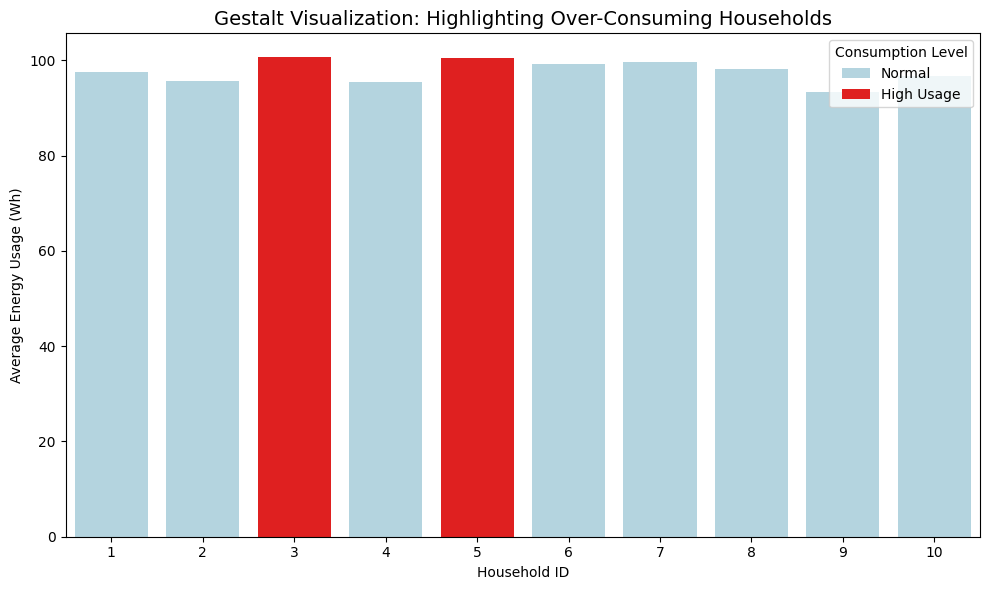

In [ ]:
# ==========================================
# QUESTION 3: APPLY GESTALT PRINCIPLES TO HIGHLIGHT OVER-CONSUMING HOUSEHOLDS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv("energydata_complete.csv", engine='python', on_bad_lines='skip')

# Step 2: Preprocess (simulate multiple households for visualization)
# Since original dataset represents one home, we simulate 10 virtual households
np.random.seed(42)
data['household_id'] = np.random.randint(1, 11, data.shape[0])

# Step 3: Compute average consumption per household
household_usage = data.groupby('household_id')['Appliances'].mean().reset_index()

# Define threshold for high energy usage
threshold = household_usage['Appliances'].mean() + household_usage['Appliances'].std()
household_usage['status'] = np.where(household_usage['Appliances'] > threshold, 'High Usage', 'Normal')

# Step 4: Visualization using Gestalt principles
plt.figure(figsize=(10, 6))
sns.barplot(
    x='household_id',
    y='Appliances',
    hue='status',
    data=household_usage,
    palette={'Normal': 'lightblue', 'High Usage': 'red'}
)

plt.title('Gestalt Visualization: Highlighting Over-Consuming Households', fontsize=14)
plt.xlabel('Household ID')
plt.ylabel('Average Energy Usage (Wh)')
plt.legend(title='Consumption Level')
plt.tight_layout()
plt.show()

# Explanation:
# The plot applies Gestalt principles of Similarity and Figure-Ground.
# Normal households are shown in light blue, while high-consuming ones are highlighted in red.
# This color distinction allows instant visual identification of anomalies.

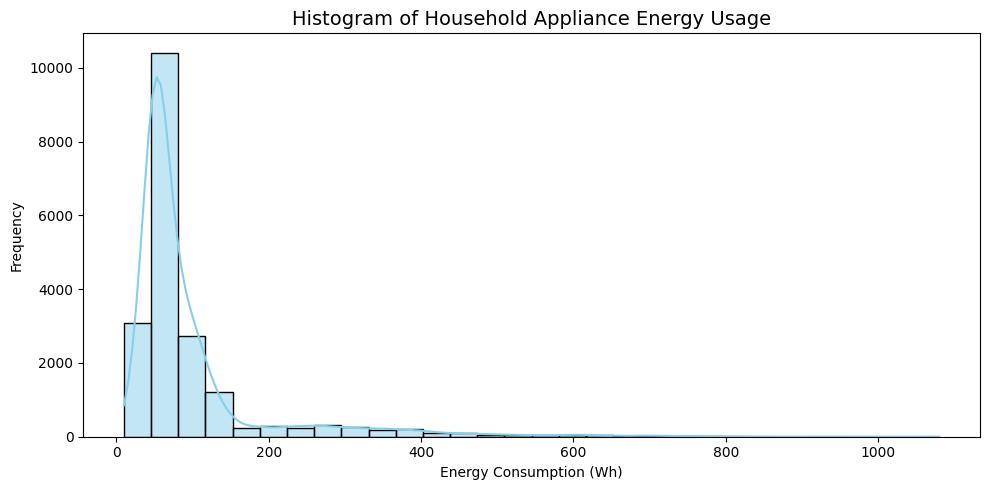

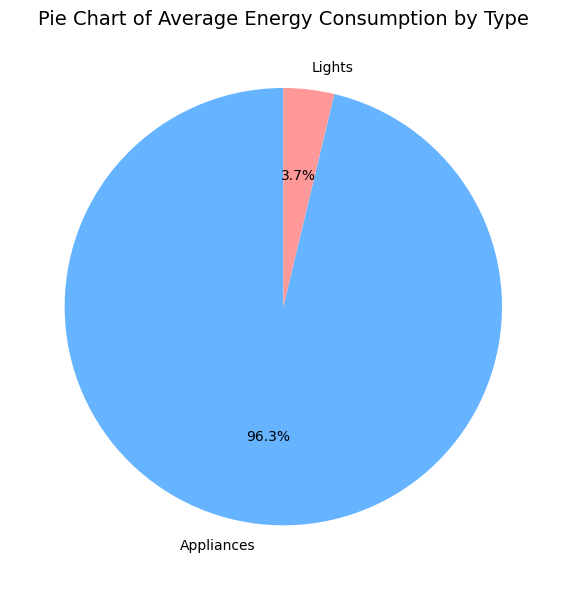

In [ ]:
# ==========================================
# QUESTION 4: UNIVARIATE ANALYSIS
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv("energydata_complete.csv")

# Step 2: Histogram for Household Energy Usage
plt.figure(figsize=(10, 5))
sns.histplot(data['Appliances'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Household Appliance Energy Usage', fontsize=14)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 3: Pie Chart of Appliance Energy vs Lights Energy
avg_appliances = data['Appliances'].mean()
avg_lights = data['lights'].mean()

plt.figure(figsize=(6, 6))
plt.pie(
    [avg_appliances, avg_lights],
    labels=['Appliances', 'Lights'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90
)
plt.title('Pie Chart of Average Energy Consumption by Type', fontsize=14)
plt.tight_layout()
plt.show()

# Explanation:
# The histogram shows how household appliance energy usage is distributed.
# The pie chart shows the relative contribution of appliances vs lights to overall energy consumption.


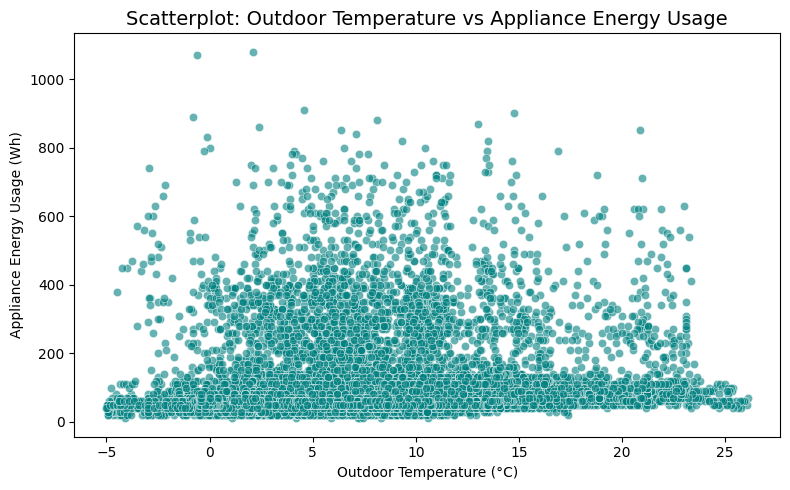

/tmp/ipython-input-2241978934.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='household_id', y='Appliances', data=data, palette='Set3')


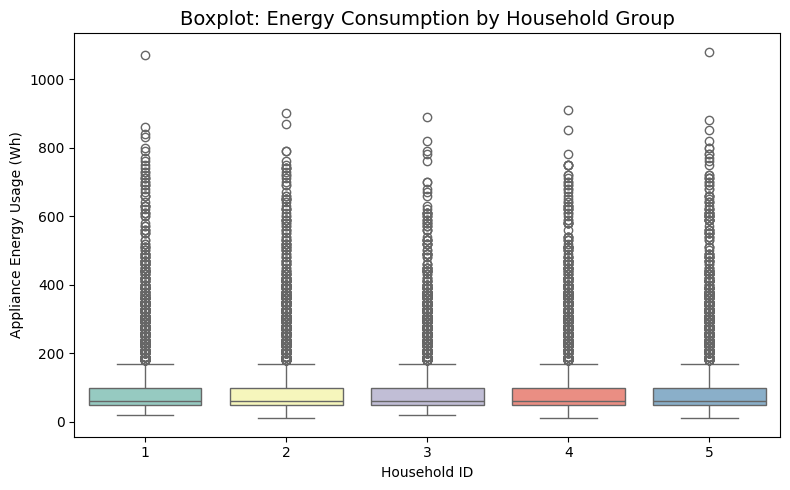

In [ ]:
# ==========================================
# QUESTION 5: BIVARIATE ANALYSIS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv("energydata_complete.csv", on_bad_lines='skip', engine='python')

# Step 2: Scatterplot (Temperature vs Energy Usage)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='T_out', y='Appliances', data=data, color='teal', alpha=0.6)
plt.title('Scatterplot: Outdoor Temperature vs Appliance Energy Usage', fontsize=14)
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Appliance Energy Usage (Wh)')
plt.tight_layout()
plt.show()

# Step 3: Boxplot (Consumption by Neighborhood / Household)
# Simulate household groups (since dataset is from a single house)
np.random.seed(42)
data['household_id'] = np.random.randint(1, 6, data.shape[0])  # 5 simulated neighborhoods

plt.figure(figsize=(8, 5))
sns.boxplot(x='household_id', y='Appliances', data=data, palette='Set3')
plt.title('Boxplot: Energy Consumption by Household Group', fontsize=14)
plt.xlabel('Household ID')
plt.ylabel('Appliance Energy Usage (Wh)')
plt.tight_layout()
plt.show()

# Explanation:
# - The scatterplot shows how temperature influences energy usage.
# - The boxplot compares consumption levels across multiple simulated households.
# - These visualizations help detect correlations and outliers affecting energy demand.

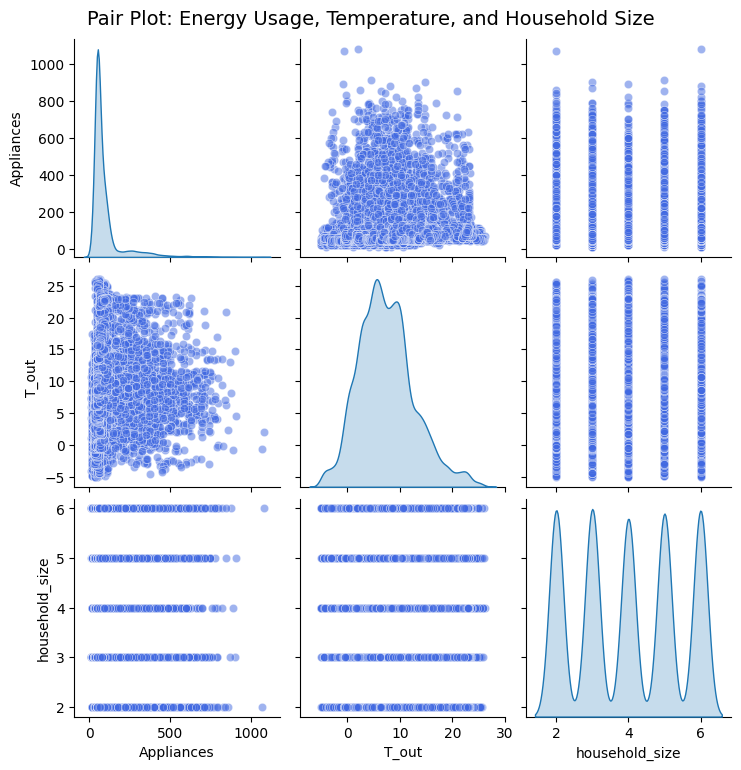

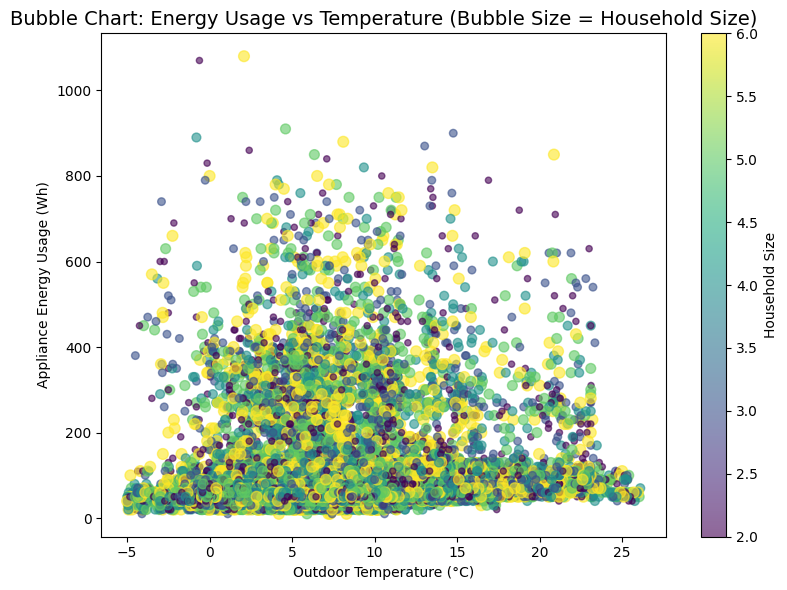

In [ ]:
# ==========================================
# QUESTION 6: MULTIVARIATE ANALYSIS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv("energydata_complete.csv")

# Step 2: Create simulated household size for multivariate context
np.random.seed(42)
data['household_size'] = np.random.randint(2, 7, data.shape[0])  # household size between 2 and 6 members

# Step 3: Pair plot (Energy Usage, Temperature, and Household Size)
subset = data[['Appliances', 'T_out', 'household_size']]
sns.pairplot(subset, diag_kind='kde', plot_kws={'alpha': 0.5, 'color': 'royalblue'})
plt.suptitle('Pair Plot: Energy Usage, Temperature, and Household Size', y=1.02, fontsize=14)
plt.show()

# Step 4: Combined visualization — Bubble Chart
plt.figure(figsize=(8, 6))
plt.scatter(
    x=data['T_out'],
    y=data['Appliances'],
    s=data['household_size'] * 10,   # bubble size
    c=data['household_size'],        # color by size
    cmap='viridis',
    alpha=0.6
)
plt.title('Bubble Chart: Energy Usage vs Temperature (Bubble Size = Household Size)', fontsize=14)
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Appliance Energy Usage (Wh)')
plt.colorbar(label='Household Size')
plt.tight_layout()
plt.show()

# Explanation:
# - The pair plot shows interrelations among multiple variables simultaneously.
# - The bubble chart combines three variables: energy usage (y-axis), temperature (x-axis), and household size (bubble size & color).
# - This helps identify how environmental and household factors jointly affect energy consumption.


In [ ]:
# ==========================================
# QUESTION 7: HIERARCHICAL VISUALIZATION
# ==========================================

import pandas as pd
import numpy as np
import plotly.express as px

# Step 1: Load dataset
data = pd.read_csv("energydata_complete.csv")

# Step 2: Simulate hierarchical levels — Districts and Households
np.random.seed(42)
data['district'] = np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=len(data))
data['household_id'] = np.random.randint(1, 21, len(data))  # 20 households total

# Step 3: Aggregate mean energy usage per household per district
agg_data = data.groupby(['district', 'household_id'])['Appliances'].mean().reset_index()

# Step 4: Treemap visualization
fig = px.treemap(
    agg_data,
    path=['district', 'household_id'],
    values='Appliances',
    color='Appliances',
    color_continuous_scale='YlOrRd',
    title='Hierarchical Treemap of Energy Consumption (Districts → Households)'
)
fig.show()

# Step 5: Optional — Sunburst Chart for similar hierarchy
fig2 = px.sunburst(
    agg_data,
    path=['district', 'household_id'],
    values='Appliances',
    color='Appliances',
    color_continuous_scale='YlOrRd',
    title='Sunburst Chart: Districts and Household Energy Usage'
)
fig2.show()

# Explanation:
# - Each district is divided into households.
# - The size of each block (or segment) shows how much energy that household consumes.
# - Warm colors (red/orange) indicate higher consumption.
# - This hierarchy helps identify which district or household contributes most to total usage.


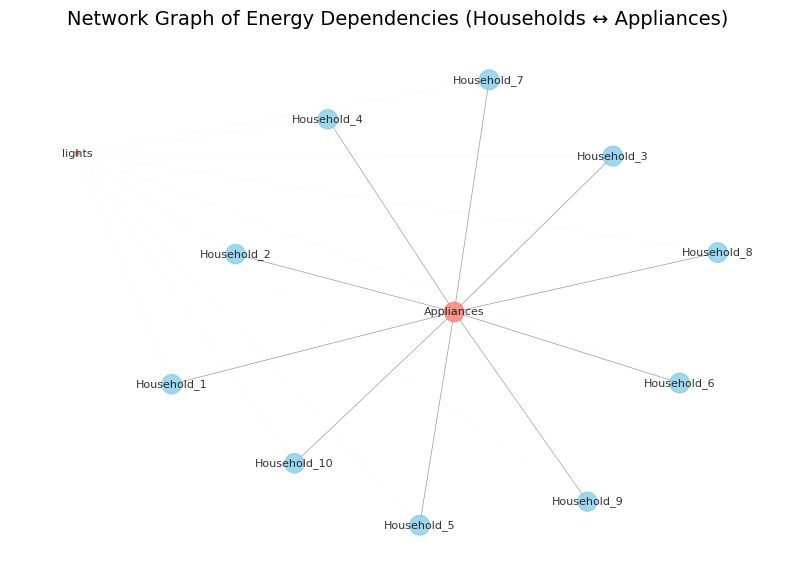

In [ ]:
# ==========================================
# QUESTION 8: NETWORK GRAPH OF ENERGY DEPENDENCIES
# ==========================================

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("energydata_complete.csv")

# Step 2: Simulate household IDs and selected appliances
np.random.seed(42)
data['household_id'] = np.random.randint(1, 11, len(data))  # 10 households

# Select a few appliance columns for simplicity
appliance_columns = ['lights', 'Appliances']
data_sample = data.groupby('household_id')[appliance_columns].mean().reset_index()

# Step 3: Build graph
G = nx.Graph()

# Add appliance nodes
for app in appliance_columns:
    G.add_node(app, type='appliance', size=data_sample[app].mean())

# Add household nodes and edges to appliances
for _, row in data_sample.iterrows():
    hid = f"Household_{int(row['household_id'])}"
    G.add_node(hid, type='household', size=row['Appliances'])
    for app in appliance_columns:
        usage = row[app]
        if usage > 0:
            G.add_edge(hid, app, weight=usage)

# Step 4: Visualization
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

# Define colors
node_colors = ['skyblue' if G.nodes[n]['type'] == 'household' else 'salmon' for n in G.nodes()]
sizes = [G.nodes[n]['size']*2 for n in G.nodes()]  # scale for visibility

# Draw the graph
nx.draw_networkx(G, pos,
                 with_labels=True,
                 node_color=node_colors,
                 node_size=sizes,
                 font_size=8,
                 width=[d['weight']/200 for (_, _, d) in G.edges(data=True)],
                 edge_color='gray',
                 alpha=0.8)

plt.title("Network Graph of Energy Dependencies (Households ↔ Appliances)", fontsize=14)
plt.axis('off')
plt.show()

# Explanation:
# - Blue nodes represent households.
# - Red nodes represent appliances.
# - Edges indicate energy usage connections.
# - Thicker edges show stronger (higher consumption) relationships.
# - Helps identify which appliances are major energy drivers across households.


Top Words in Citizen Feedback:
            word  frequency
12        energy          4
26         power          2
36         solar          2
2      awareness          1
4          bills          1
5       citizens          1
6   conservation          1
3        billing          1
0         affect          1
1     appliances          1


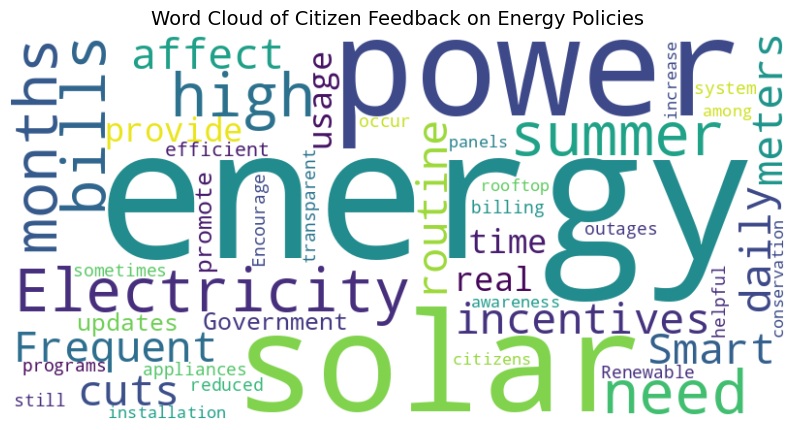

In [ ]:
# ==========================================
# QUESTION 9: TEXT DATA ANALYSIS ON CITIZEN FEEDBACK
# ==========================================

# Step 1: Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 2: Example citizen feedback dataset
feedback_data = pd.DataFrame({
    'feedback': [
        "Electricity bills are too high during summer months.",
        "We need more solar energy incentives.",
        "Frequent power cuts affect our daily routine.",
        "Smart meters should provide real-time usage updates.",
        "Government should promote energy-efficient appliances.",
        "Renewable energy programs are very helpful.",
        "The billing system should be more transparent.",
        "Power outages are reduced but still occur sometimes.",
        "Encourage installation of rooftop solar panels.",
        "Energy conservation awareness should increase among citizens."
    ]
})

# Step 3: Vectorize text data (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(feedback_data['feedback'])

# Convert to DataFrame
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
}).sort_values(by='frequency', ascending=False)

# Step 4: Display top frequent words
print("Top Words in Citizen Feedback:")
print(word_freq.head(10))

# Step 5: Generate Word Cloud
text = " ".join(feedback_data['feedback'])
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis'
).generate(text)

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Citizen Feedback on Energy Policies", fontsize=14)
plt.show()

# Explanation:
# - The text is vectorized into numerical format for analysis.
# - The word cloud highlights frequent terms like “energy,” “solar,” and “bills.”
# - This helps identify main concerns or policy improvement areas.


# ==========================================
#10.INTEGRATED DASHBOARD PIPELINE
# ==========================================
Step-by-Step Dashboard Design Pipeline
1. Data Collection and Integration:
  Gather data from sensors, households, and surveys.Merge datasets on common identifiers
2. Data Cleaning and Transformation:
  Handle missing values, remove duplicates, and normalize scales.
3. Hierarchical Data Visualization (Districts → Households):
  Use Treemaps or Sunburst charts to show proportional usage by region and household.
4. Network Visualization (Dependencies):
  Display relationships between appliances and households using NetworkX or Plotly Network
  Graphs.Highlight critical nodes (e.g., appliances consuming the most power).
5. Text Data Analysis (Feedback Insights):
  Integrate a Word Cloud or bar chart showing the most frequent citizen concerns.
  Use NLP models to analyze sentiment trends over time.
6. Interactive Filters and Controls:
  Add dropdowns/sliders to filter by date, district, or appliance. Allow users to compare.
7. Real-Time and Predictive Analytics:
  Include line charts or gauges for real-time energy demand.
  Display results of regression or clustering models predicting future consumption.
8. Dashboard Tools and Frameworks:
  Use Plotly Dash, Power BI, or Tableau for a professional, interactive interface.
  Combine multiple panels: hierarchical, network, text, and time series.

In [ ]:
# ==========================================
# QUESTION 11: POINT DATA (Simplified)
# ==========================================

import pandas as pd
import numpy as np
import plotly.express as px

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Add sample household coordinates
np.random.seed(42)
data['household_id'] = np.random.randint(1, 31, len(data))  # 30 households
data['latitude'] = np.random.uniform(13.00, 13.20, len(data))
data['longitude'] = np.random.uniform(80.10, 80.30, len(data))

# Average usage per household
household_usage = data.groupby(['household_id', 'latitude', 'longitude'])['Appliances'].mean().reset_index()

# Plot map
fig = px.scatter_mapbox(
    household_usage,
    lat='latitude',
    lon='longitude',
    size='Appliances',
    color='Appliances',
    color_continuous_scale='YlOrRd',
    mapbox_style='carto-positron',
    zoom=10,
    title='Map of Household Energy Usage'
)

fig.show()


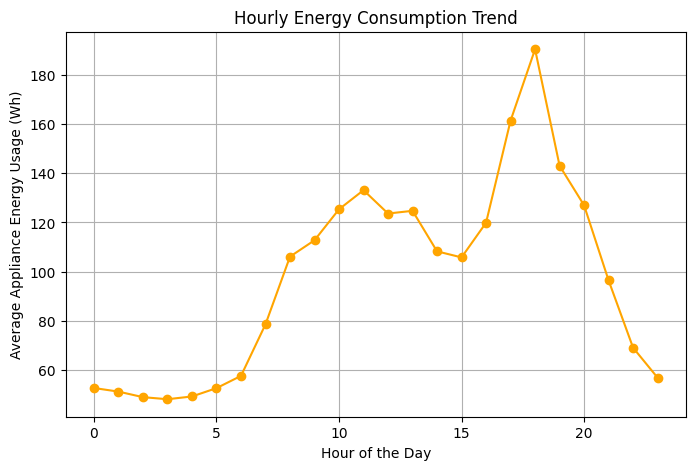

In [ ]:
# ==========================================
# QUESTION 12: LINE DATA - ENERGY TREND OVER TIME
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Group by hour to see average energy usage trend
hourly_usage = data.groupby(data['date'].dt.hour)['Appliances'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(hourly_usage['date'], hourly_usage['Appliances'], color='orange', marker='o')
plt.title("Hourly Energy Consumption Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Appliance Energy Usage (Wh)")
plt.grid(True)
plt.show()


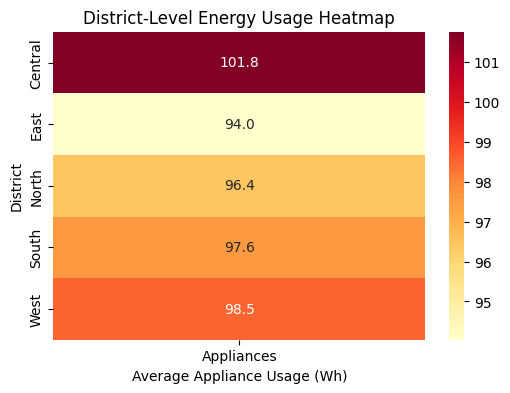

In [ ]:
# ==========================================
# QUESTION 13: AREA DATA - HEATMAP OF DISTRICT ENERGY USAGE
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("energydata_complete.csv", on_bad_lines='skip', engine='python')

# Simulate districts for households
np.random.seed(42)
data['district'] = np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=len(data))
data['household_id'] = np.random.randint(1, 21, len(data))

# Calculate average energy usage by district
district_usage = data.groupby('district')['Appliances'].mean().reset_index()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(district_usage.set_index('district'), annot=True, cmap='YlOrRd', fmt=".1f")
plt.title("District-Level Energy Usage Heatmap")
plt.ylabel("District")
plt.xlabel("Average Appliance Usage (Wh)")
plt.show()

In [ ]:
# ==========================================
# QUESTION 14: ANIMATED VISUALIZATION - HOURLY CONSUMPTION PATTERNS
# ==========================================

import pandas as pd
import numpy as np
import plotly.express as px

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract hour and simulate districts
np.random.seed(42)
data['hour'] = data['date'].dt.hour
data['district'] = np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=len(data))

# Aggregate hourly usage per district
hourly_data = data.groupby(['hour', 'district'])['Appliances'].mean().reset_index()

# Create animated bar chart
fig = px.bar(
    hourly_data,
    x='district',
    y='Appliances',
    color='district',
    animation_frame='hour',
    range_y=[0, hourly_data['Appliances'].max() + 20],
    title='Animated Hourly Energy Consumption by District'
)

fig.show()


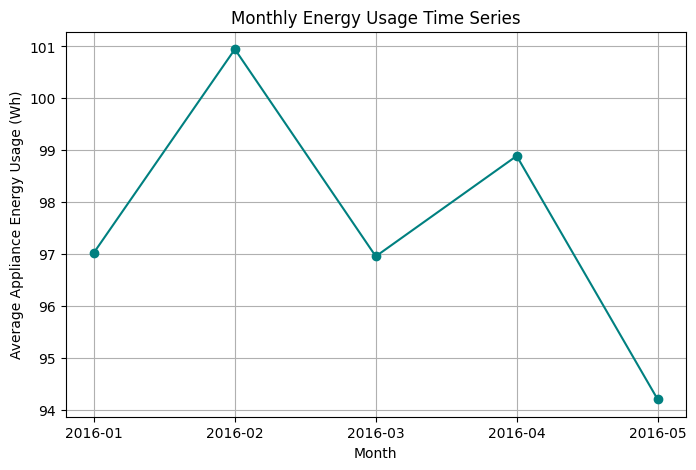

In [ ]:
# ==========================================
# QUESTION 15: TIME SERIES - MONTHLY ENERGY USAGE
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Group by month and calculate average energy usage
data['month'] = data['date'].dt.to_period('M')
monthly_usage = data.groupby('month')['Appliances'].mean().reset_index()

# Plot time series
plt.figure(figsize=(8,5))
plt.plot(monthly_usage['month'].astype(str), monthly_usage['Appliances'], marker='o', color='teal')
plt.title("Monthly Energy Usage Time Series")
plt.xlabel("Month")
plt.ylabel("Average Appliance Energy Usage (Wh)")
plt.grid(True)
plt.show()


/tmp/ipython-input-3320403297.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




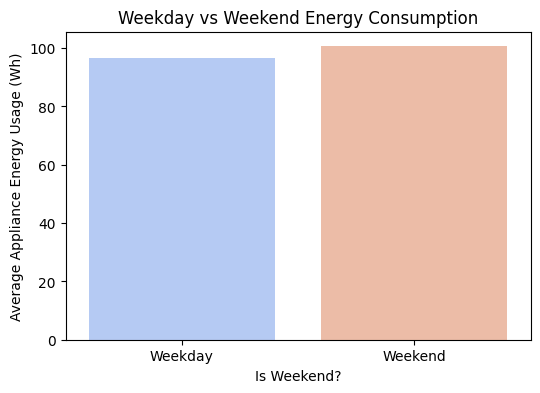

In [ ]:
# ==========================================
# QUESTION 16: WEEKDAY vs WEEKEND CONSUMPTION
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract weekday information
data['day_of_week'] = data['date'].dt.day_name()
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday'])

# Group by weekday/weekend and calculate average usage
avg_usage = data.groupby('is_weekend')['Appliances'].mean().reset_index()

# Plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x='is_weekend', y='Appliances', data=avg_usage, palette='coolwarm')
plt.title("Weekday vs Weekend Energy Consumption")
plt.xlabel("Is Weekend?")
plt.ylabel("Average Appliance Energy Usage (Wh)")
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.show()


Regression Coefficients:
   Feature  Coefficient
0      T1     3.230046
1    RH_1     1.472628
2  lights     2.485019


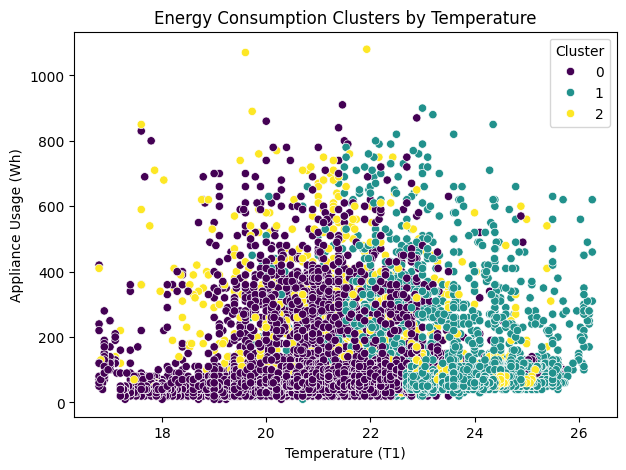

In [ ]:
# ==========================================
# QUESTION 17: REGRESSION & CLUSTERING ANALYSIS
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Select important columns
cols = ['Appliances', 'lights', 'T1', 'RH_1']
df = data[cols].dropna()

# -------------------------
# 🔹 REGRESSION ANALYSIS
# -------------------------
X = df[['T1', 'RH_1', 'lights']]   # Independent variables
y = df['Appliances']               # Target variable

model = LinearRegression()
model.fit(X, y)

# Get regression coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Regression Coefficients:\n", coefficients)

# -------------------------
# 🔹 CLUSTERING ANALYSIS
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x='T1', y='Appliances', hue='Cluster', data=df, palette='viridis')
plt.title("Energy Consumption Clusters by Temperature")
plt.xlabel("Temperature (T1)")
plt.ylabel("Appliance Usage (Wh)")
plt.show()


In [ ]:
# ==========================================
# QUESTION 18: PREDICTIVE MODEL EVALUATION
# ==========================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Select relevant columns
cols = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2']
df = data[cols].dropna()

# Split into input (X) and target (y)
X = df.drop('Appliances', axis=1)
y = df['Appliances']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 🔹 MODEL 1: Linear Regression
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# -------------------------
# 🔹 MODEL 2: Random Forest
# -------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# -------------------------
# 📊 EVALUATION
# -------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)



Linear Regression Performance:
R² Score: 0.104
Mean Absolute Error: 55.44

Random Forest Performance:
R² Score: 0.381
Mean Absolute Error: 39.73
